In [ ]:
!pip install langchain==0.3.24 -q
!pip install langchain-openai -q
!pip install langgraph -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.4/438.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 14.4 MB/s eta 0:00:00


### Chat Agent + Conversational Chat Agent

In [ ]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END

# from typing import TypedDict, List, Union
# from langchain_core.messages import HumanMessage, AIMessage

In [ ]:
class AgentState(TypedDict):
    messages: List[HumanMessage]

# class AgentState(TypedDict):
#     messages: List[Union[HumanMessage, AIMessage]]

In [ ]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('API_KEY')

llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0
)

In [ ]:
def chatbot(state: AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    # state["messages"].append(AIMessage(content=response.content))
    print(f"\nAI: {response.content}")
    return state

In [ ]:
workflow = StateGraph(AgentState)

workflow.add_node("chatbot", chatbot)

workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot", END)

app = workflow.compile()

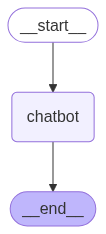

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
user_input = input("Enter a Query: ")
result = app.invoke({"messages": [HumanMessage(content=user_input)]})

Enter a Query: hello

AI: Hello! How can I assist you today?


In [ ]:
user_input = input("Enter a Query: ")
while user_input != "exit":
    result = app.invoke({"messages": [HumanMessage(content=user_input)]})
    user_input = input("Enter a Query: ")

# conversation_history = []
# user_input = input("Enter a Query: ")
# while user_input != "exit":
#     conversation_history.append(HumanMessage(content=user_input))
#     result = app.invoke({"messages": conversation_history})
#     conversation_history = result["messages"]
#     user_input = input("Enter a Query: ")

Enter a Query: hello. im dinesh

AI: Hello, Dinesh! How can I assist you today?
Enter a Query: who am I

AI: You are a unique individual with your own thoughts, experiences, and identity. If you provide more context or specific details, I might be able to help you with something more specific!
Enter a Query: exit
